In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn import linear_model

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [5]:
display(students.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [6]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


array(['F', 'M'], dtype=object)

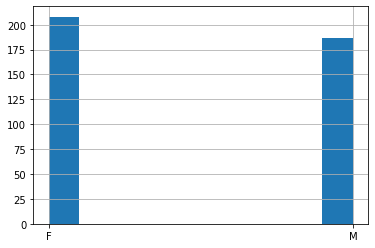

In [7]:
# проверяем распределение Sex
students.sex.hist()
students.sex.unique()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
[18 17 15 16 19 22 20 21]


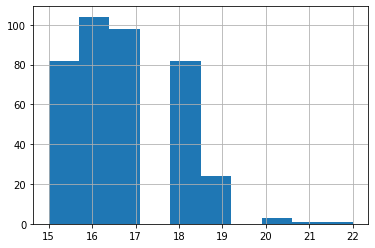

In [8]:
# проверяем распределение Age
students.age.hist()
print(students.age.describe())
print(students.age.unique())

In [9]:
print(students[(students.age > 18)])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
127     GP   F   19       U     GT3       T   0.0   1.0   at_home     other   
153     GP   M   19       U     GT3     NaN   3.0   2.0  services   at_home   
210     GP   F   19       U     GT3     NaN   3.0   3.0     other     other   
247     GP   M   22       U     GT3       T   3.0   1.0  services  services   
257     GP   M   19       U     LE3       A   4.0   3.0  services   at_home   
270     GP   F   19     NaN     GT3       T   3.0   3.0     other  services   
296     GP   F   19       U     GT3       T   4.0   4.0    health     other   
304     GP   M   19       U     GT3       T   3.0   3.0     other     other   
306     GP   M   20       U     GT3       A   3.0   2.0  services     other   
307     GP   M   19       U     GT3     NaN   4.0   4.0   teacher  services   
308     GP   M   19       R     GT3       T   3.0   3.0     other  services   
309     GP   F   19       U     LE3       T   1.0   

In [10]:
#проверяем Age на выбросы
IQR = students.age.quantile(0.75) - students.age.quantile(0.25)
perc25 = students.age.quantile(0.25)
perc75 = students.age.quantile(0.75)
print(students[(students.age < perc25 - 1.5 * IQR)])
print(students[(students.age > perc75 + 1.5 * IQR)])

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, studytime_granular, higher, internet, romantic, famrel, freetime, goout, health, absences, score]
Index: []
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
247     GP   M   22       U     GT3       T   3.0   1.0  services  services   

    reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
247  other   mother         1.0        1.0       3.0        no     no   no   

    activities nursery  studytime_granular higher internet romantic  famrel  \
247         no      no                -3.0     no      yes      yes     5.0   

     freetime  goout  health  absences  score  
247       4.0    5.0     1.0      16.0   40.0  


In [11]:
students.age = students.age[(students.age < 22)] #убираем выбросы из Age

In [12]:
#Address
students.address = students.address.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
print(students.address.unique())
print(students.address.value_counts())
print("Значений, встретившихся в столбце более 10 раз:", (students.address.value_counts()>10).sum())

['U' None 'R']
U    295
R     83
Name: address, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [13]:
#FAMSIZE

[None 'GT3' 'LE3']
GT3    261
LE3    107
Name: famsize, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


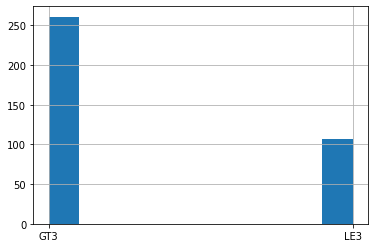

In [14]:
students.famsize.hist()
students.famsize = students.famsize.apply(lambda x: None if pd.isna(x) else x)
print(students.famsize.unique())
print(students.famsize.value_counts())
print("Значений, встретившихся в столбце более 10 раз:", (students.famsize.value_counts()>10).sum())

In [15]:
#Pstatus

['A' nan 'T']
T    314
A     36
Name: Pstatus, dtype: int64


<AxesSubplot:>

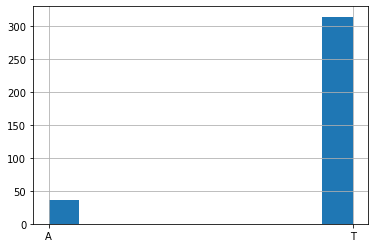

In [16]:
print(students.Pstatus.unique())
print(students.Pstatus.value_counts())
students.Pstatus.hist()


In [17]:
#есть NaN - убираем
students.Pstatus = students.Pstatus.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
#проверяем
print(students.Pstatus.unique())
print(students.Pstatus.value_counts())
print("Значений, встретившихся в столбце более 10 раз:", (students.Pstatus.value_counts()>10).sum())

['A' None 'T']
T    314
A     36
Name: Pstatus, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


In [18]:
#MEDU

[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


<AxesSubplot:>

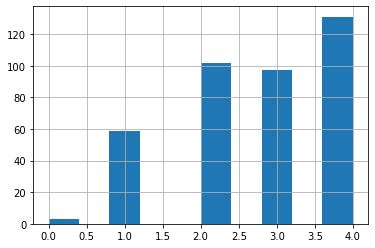

In [19]:
print(students.Medu.unique())
print(students.Medu.value_counts())
students.Medu.hist()

[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16.0,None,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16.0,R,GT3,None,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18.0,U,GT3,None,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


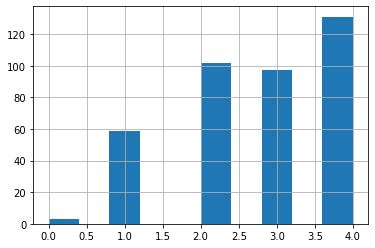

In [20]:
#есть NaN - убираем
students.Medu = students.Medu.apply(lambda x: None if pd.isnull(x) else x)
#проверяем
print(students.Medu.unique())
print(students.Medu.value_counts())
#проверяем распределение
students.Medu.hist()
students[(pd.isnull(students.Medu))] #почему-то здесь не убирается NaN, ни через isna, ни через isnull, при этом Python очевидно может их идентифицировать

In [21]:
#FEDU

[ 4.  1.  2.  3. 40. nan  0.]
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


<AxesSubplot:>

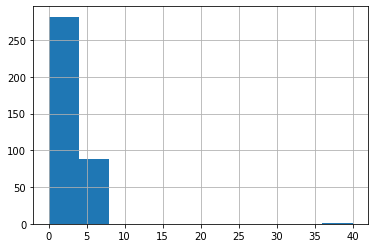

In [22]:
print(students.Fedu.unique())
print(students.Fedu.value_counts())
students.Fedu.hist()

   school sex   age address famsize Pstatus  Medu  Fedu      Mjob   Fjob  \
11     GP   F  15.0       U     GT3    None   2.0  40.0  services  other   

        reason guardian  traveltime  studytime  failures schoolsup famsup  \
11  reputation   father         3.0        3.0       0.0        no    yes   

   paid activities nursery  studytime_granular higher internet romantic  \
11   no        yes     yes                -9.0    yes      yes       no   

    famrel  freetime  goout  health  absences  score  
11     5.0       2.0    2.0     4.0       4.0   60.0  
[ 4.  1.  2.  3. nan  0.]
2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64
    school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
21      GP   M  15.0       U     GT3       T   4.0   NaN    health    health   
42      GP   M  15.0       U     GT3       T   4.0   NaN  services   teacher   
46      GP   F  16.0       U     LE3       A   3.0   NaN     other  services   
57   

/Users/boristroynik/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

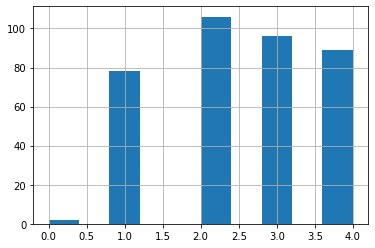

In [23]:
#Здесь явно закралась ошибка - кто-то написал 40. вместо 4.0. Исправляем
print(students[(students.Fedu > 4)])
students.Fedu.iloc[11] = 4.0
#также убираем 'nan'
students.Fedu = students.Fedu.apply(lambda x: None if pd.isna(x) else x)
#проверяем
print(students.Fedu.unique())
print(students.Fedu.value_counts())
print(students[(pd.isna(students.Fedu))]) #аналогичная история, здесь не получается убрать NaN
students.Fedu.hist()

['at_home' 'health' 'other' 'services' 'teacher' nan]
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


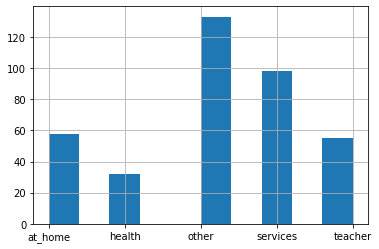

In [24]:
#MJOB
print(students.Mjob.unique())
print(students.Mjob.value_counts())
students.Mjob.hist()
print("Значений, встретившихся в столбце более 10 раз:", (students.Mjob.value_counts()>10).sum())

['at_home' 'health' 'other' 'services' 'teacher' None]
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


<AxesSubplot:>

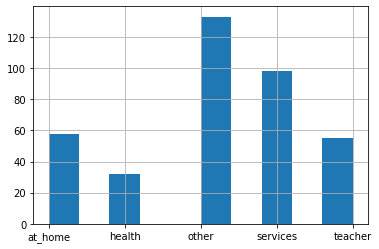

In [25]:
#убираем 'nan'
students.Mjob = students.Mjob.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)
#проверяем
print(students.Mjob.unique())
print(students.Mjob.value_counts())
students.Mjob.hist()

In [26]:
#FJOB

['teacher' 'other' nan 'health' 'services' 'at_home']
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
Значений, встретившихся в столбце более 10 раз: 5


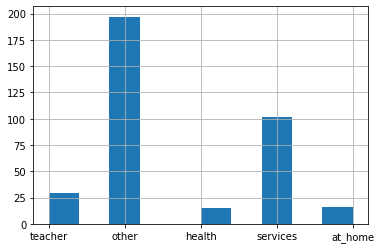

In [27]:
print(students.Fjob.unique())
print(students.Fjob.value_counts())
students.Fjob.hist()
print("Значений, встретившихся в столбце более 10 раз:", (students.Fjob.value_counts()>10).sum())

In [28]:
#убираем 'nan'
students.Fjob = students.Fjob.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

['teacher' 'other' None 'health' 'services' 'at_home']
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


<AxesSubplot:>

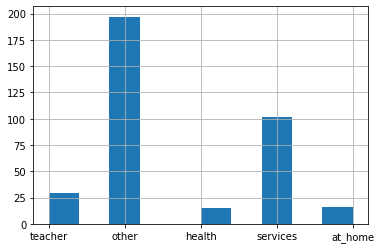

In [29]:
#проверяем
print(students.Fjob.unique())
print(students.Fjob.value_counts())
students.Fjob.hist()

In [30]:
#REASON

['course' 'other' 'home' 'reputation' nan]
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
Значений, встретившихся в столбце более 10 раз: 4


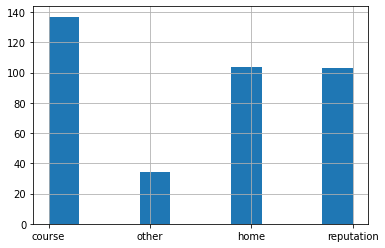

In [31]:
print(students.reason.unique())
print(students.reason.value_counts())
students.reason.hist()
print("Значений, встретившихся в столбце более 10 раз:", (students.reason.value_counts()>10).sum())

In [32]:
#убираем 'nan'
students.reason = students.reason.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [33]:
#проверяем
print(students.reason.unique())
print(students.reason.value_counts())

['course' 'other' 'home' 'reputation' None]
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


In [34]:
#GUARDIAN

['mother' 'father' 'other' nan]
mother    250
father     86
other      28
Name: guardian, dtype: int64
Значений, встретившихся в столбце более 10 раз: 3


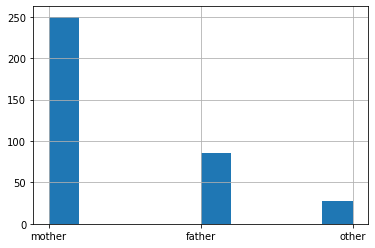

In [35]:
print(students.guardian.unique())
print(students.guardian.value_counts())
students.guardian.hist()
print("Значений, встретившихся в столбце более 10 раз:", (students.guardian.value_counts()>10).sum())

In [36]:
#убираем 'nan'
students.guardian = students.guardian.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [37]:
#проверяем
print(students.guardian.unique())
print(students.guardian.value_counts())

['mother' 'father' 'other' None]
mother    250
father     86
other      28
Name: guardian, dtype: int64


In [38]:
#TRAVELTIME

[ 2.  1.  3. nan  4.]
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

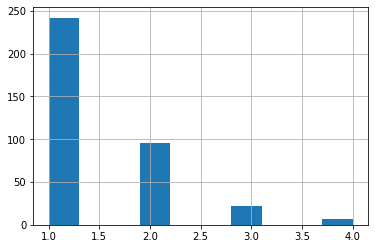

In [39]:
print(students.traveltime.unique())
print(students.traveltime.value_counts())
students.traveltime.hist()
students.traveltime.describe()

In [40]:
#убираем 'nan'
students.traveltime = students.traveltime.apply(lambda x: None if pd.isna(x) else x)

In [41]:
#проверяем
print(students.traveltime.unique())
print(students.traveltime.value_counts())
#вывод - не получилось :-о

[ 2.  1.  3. nan  4.]
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


In [42]:
#STUDYTIME

[ 2.  3.  1. nan  4.]
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


<AxesSubplot:>

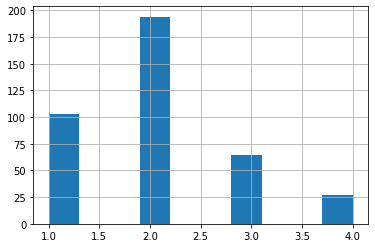

In [43]:
print(students.studytime.unique())
print(students.studytime.value_counts())
students.studytime.hist()

In [44]:
#FAILURES

[ 0.  3. nan  2.  1.]
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


<AxesSubplot:>

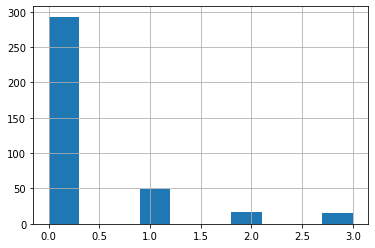

In [45]:
print(students.failures.unique())
print(students.failures.value_counts())
students.failures.hist()

In [46]:
#ACTIVITIES

['no' 'yes' nan]
yes    195
no     186
Name: activities, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


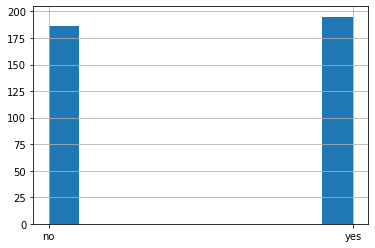

In [47]:
print(students.activities.unique())
print(students.activities.value_counts())
students.activities.hist()
print("Значений, встретившихся в столбце более 10 раз:", (students.activities.value_counts()>10).sum())

In [48]:
#убираем 'nan'
students.activities = students.activities.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [49]:
#проверяем
print(students.activities.unique())
print(students.activities.value_counts())

['no' 'yes' None]
yes    195
no     186
Name: activities, dtype: int64


In [50]:
#NURSERY

['yes' 'no' nan]
yes    300
no      79
Name: nursery, dtype: int64
Значений, встретившихся в столбце более 10 раз: 2


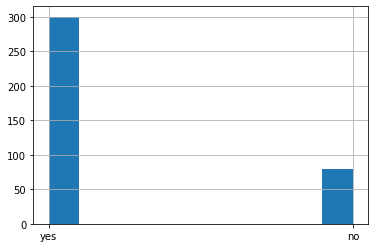

In [51]:
print(students.nursery.unique())
print(students.nursery.value_counts())
students.nursery.hist()
print("Значений, встретившихся в столбце более 10 раз:", (students.nursery.value_counts()>10).sum())

In [52]:
#убираем 'nan'
students.nursery = students.nursery.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [53]:
#проверяем
print(students.nursery.unique())
print(students.nursery.value_counts())

['yes' 'no' None]
yes    300
no      79
Name: nursery, dtype: int64


In [54]:
#HIGHER

['yes' nan 'no']
yes    356
no      19
Name: higher, dtype: int64


<AxesSubplot:>

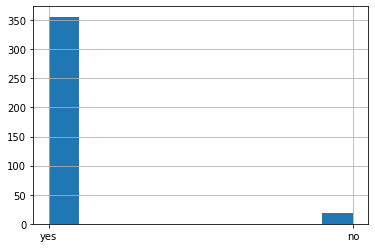

In [55]:
print(students.higher.unique())
print(students.higher.value_counts())
students.higher.hist()

In [56]:
#убираем 'nan'
students.higher = students.higher.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [57]:
#проверяем
print(students.higher.unique())
print(students.higher.value_counts())

['yes' None 'no']
yes    356
no      19
Name: higher, dtype: int64


In [58]:
#INTERNET

[nan 'yes' 'no']
yes    305
no      56
Name: internet, dtype: int64


<AxesSubplot:>

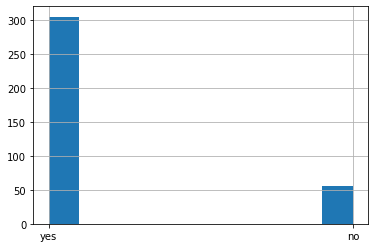

In [59]:
print(students.internet.unique())
print(students.internet.value_counts())
students.internet.hist()

In [60]:
#убираем 'nan'
students.internet = students.internet.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [61]:
#проверяем
print(students.internet.unique())
print(students.internet.value_counts())

[None 'yes' 'no']
yes    305
no      56
Name: internet, dtype: int64


In [62]:
#ROMANTIC

['no' nan 'yes']
no     240
yes    124
Name: romantic, dtype: int64


<AxesSubplot:>

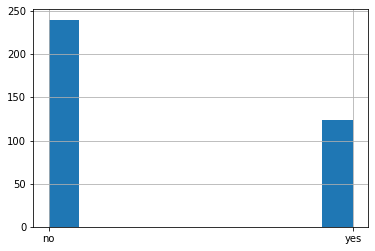

In [63]:
print(students.romantic.unique())
print(students.romantic.value_counts())
students.romantic.hist()

In [64]:
#убираем 'nan'
students.romantic = students.romantic.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [65]:
#проверяем
print(students.romantic.unique())
print(students.romantic.value_counts())

['no' None 'yes']
no     240
yes    124
Name: romantic, dtype: int64


In [66]:
#FAMREL

[ 4.  5.  3. nan -1.  2.  1.]
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


<AxesSubplot:>

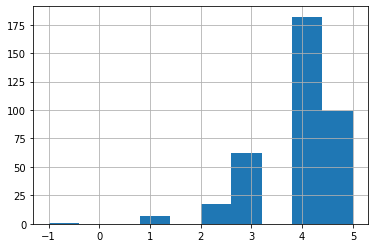

In [67]:
print(students.famrel.unique())
print(students.famrel.value_counts())
students.famrel.hist()

In [68]:
#Есть две ошибки - 'nan' и отрицательное значение. Сначала уберем 'nan'
students.famrel = students.famrel.apply(lambda x: None if x is np.NaN else x)

In [69]:
#теперь, уберем отрицательное значение. Его можно просто исключить как брак данных, но я предпочту поставить 1 - самый нижний вариант, так как по-моему это и имелось в виду
print(students[(students.famrel.astype(float) < 0)])
students.famrel.iloc[25] = 1.0

   school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
25     GP   F  16.0       U     GT3    None   2.0   2.0  services  services   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
25   home   mother         1.0        1.0       2.0        no    yes  yes   

   activities nursery  studytime_granular higher internet romantic  famrel  \
25         no      no                -3.0    yes      yes       no    -1.0   

    freetime  goout  health  absences  score  
25       2.0    2.0     5.0      14.0   40.0  


/Users/boristroynik/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [70]:
#FREETIME

[ 3.  2.  4.  1.  5. nan]
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


<AxesSubplot:>

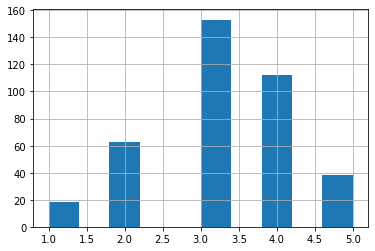

In [71]:
print(students.freetime.unique())
print(students.freetime.value_counts())
students.freetime.hist()

In [72]:
#GOOUT

[ 4.  3.  2.  1.  5. nan]
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


<AxesSubplot:>

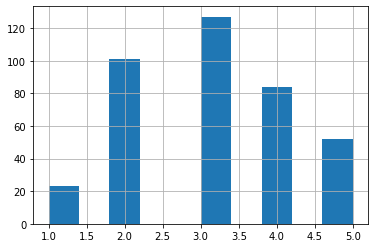

In [73]:
print(students.goout.unique())
print(students.goout.value_counts())
students.goout.hist()

In [74]:
#HEALTH

[ 3.  5.  1.  2.  4. nan]
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


<AxesSubplot:>

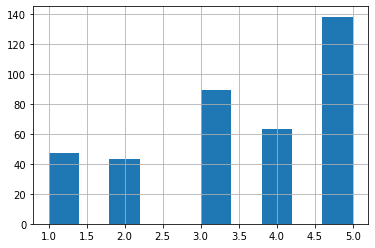

In [75]:
print(students.health.unique())
print(students.health.value_counts())
students.health.hist()

In [76]:
#ABSENCES

[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64


<AxesSubplot:>

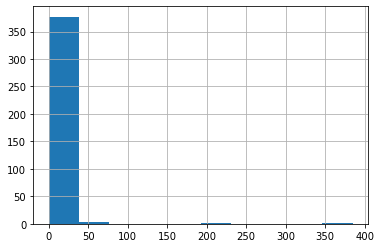

In [77]:
print(students.absences.unique())
print(students.absences.value_counts())
students.absences.hist()

In [78]:
#проверяем Absences на выбросы
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
#print(students[(students.absences < perc25 - 1.5 * IQR)])
print(students[(students.absences > perc75 + 1.5 * IQR)])

    school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
40      GP   F  16.0       U     LE3       T   2.0   2.0     other     other   
74      GP   F  16.0       U     GT3       T   3.0   3.0     other  services   
103     GP   F  15.0       U     GT3       T   3.0   2.0  services     other   
183     GP   F  17.0       U     LE3    None   3.0   3.0     other     other   
198     GP   F  17.0       U     GT3    None   4.0   4.0  services   teacher   
205     GP   F  17.0       U     GT3       T   3.0   4.0   at_home  services   
216     GP   F  17.0       U     GT3       T   4.0   3.0     other      None   
222     GP   F  16.0       U     GT3       T   2.0   3.0  services   teacher   
260     GP   F  18.0       U     GT3    None   4.0   3.0      None     other   
276     GP   F  18.0       R     GT3       A   3.0   2.0     other  services   
277     GP   M  18.0       U     GT3       T   4.0   4.0      None  services   
280     GP   M  17.0       U    None    

In [79]:
students.absences = students.absences[(students.absences < 212)] #убираем выбросы из Absences

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
13.0      2
15.0      2
11.0      2
38.0      1
56.0      1
23.0      1
24.0      1
25.0      1
40.0      1
17.0      1
75.0      1
21.0      1
28.0      1
19.0      1
26.0      1
30.0      1
54.0      1
Name: absences, dtype: int64


<AxesSubplot:>

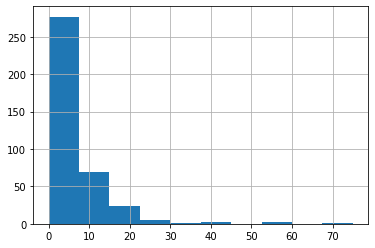

In [80]:
#проверяем
print(students.absences.value_counts())
students.absences.hist()

In [81]:
#проверяем
print(students.absences.unique())
print(students.absences.value_counts())

[ 6.  4. 10.  2.  0. 16. nan 14.  7.  8. 25. 12. 54. 18. 26. 20. 56. 24.
 28.  5. 13. 15. 22.  3. 21.  1. 75. 30. 19.  9. 11. 38. 40. 23. 17.]
0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
13.0      2
15.0      2
11.0      2
38.0      1
56.0      1
23.0      1
24.0      1
25.0      1
40.0      1
17.0      1
75.0      1
21.0      1
28.0      1
19.0      1
26.0      1
30.0      1
54.0      1
Name: absences, dtype: int64


In [82]:
#SCORE

[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64


<AxesSubplot:>

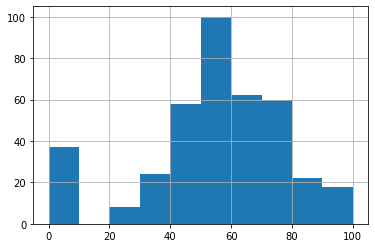

In [83]:
print(students.score.unique())
print(students.score.value_counts())
students.score.hist()

In [84]:
#проверяем SCORE на выбросы
IQR = students.score.quantile(0.75) - students.age.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print(students[(students.score < perc25 - 1.5 * IQR)])
print(students[(students.score > perc75 + 1.5 * IQR)])

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, studytime_granular, higher, internet, romantic, famrel, freetime, goout, health, absences, score]
Index: []
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, studytime_granular, higher, internet, romantic, famrel, freetime, goout, health, absences, score]
Index: []


In [85]:
#слишком большой разброс (IQR) чтобы что-либо отфильтровывать
print(perc25, perc75, IQR)

40.0 70.0 54.0


/Users/boristroynik/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

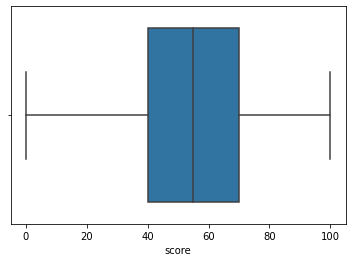

In [86]:
sns.boxplot(students.score)
students.score.describe()

In [87]:
#FAMSUP

['no' 'yes' nan]
yes    219
no     137
Name: famsup, dtype: int64


<AxesSubplot:>

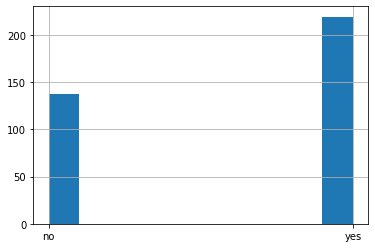

In [88]:
print(students.famsup.unique())
print(students.famsup.value_counts())
students.famsup.hist()

In [89]:
#убираем 'nan'
students.famsup = students.famsup.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [90]:
#проверяем
print(students.famsup.unique())
print(students.famsup.value_counts())

['no' 'yes' None]
yes    219
no     137
Name: famsup, dtype: int64


In [91]:
#SCHOOLSUP

['yes' 'no' nan]
no     335
yes     51
Name: schoolsup, dtype: int64


<AxesSubplot:>

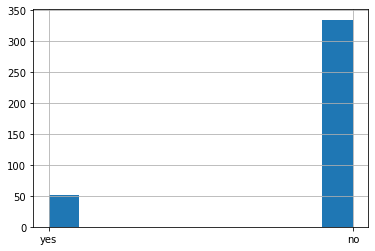

In [92]:
print(students.schoolsup.unique())
print(students.schoolsup.value_counts())
students.schoolsup.hist()

In [93]:
#убираем 'nan'
students.schoolsup = students.schoolsup.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [94]:
#проверяем
print(students.schoolsup.unique())
print(students.schoolsup.value_counts())

['yes' 'no' None]
no     335
yes     51
Name: schoolsup, dtype: int64


In [95]:
#STUDYTIME GRANULAR

[ -6.  -9.  -3.  nan -12.]
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64


<AxesSubplot:>

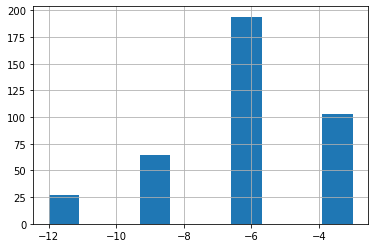

In [96]:
print(students.studytime_granular.unique())
print(students.studytime_granular.value_counts())
students.studytime_granular.hist()

In [97]:
students.studytime_granular = students.studytime_granular.dropna()

[ -6.  -9.  -3.  nan -12.]
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64


<AxesSubplot:>

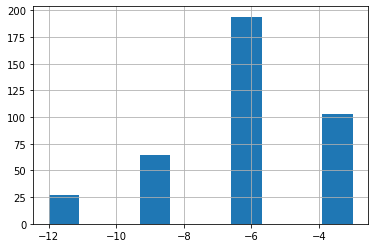

In [98]:
print(students.studytime_granular.unique())
print(students.studytime_granular.value_counts())
students.studytime_granular.hist()

In [99]:
#PAID

['no' nan 'yes']
no     200
yes    155
Name: paid, dtype: int64


<AxesSubplot:>

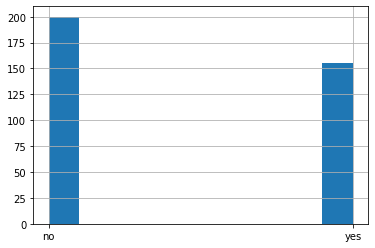

In [100]:
print(students.paid.unique())
print(students.paid.value_counts())
students.paid.hist()

In [101]:
#убираем 'nan'
students.paid = students.paid.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [102]:
#проверяем
print(students.paid.unique())
print(students.paid.value_counts())

['no' None 'yes']
no     200
yes    155
Name: paid, dtype: int64


In [103]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

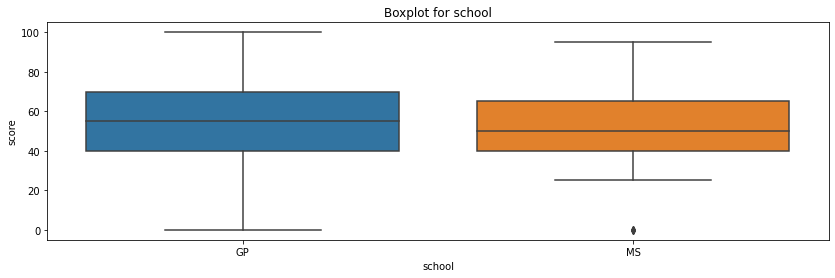

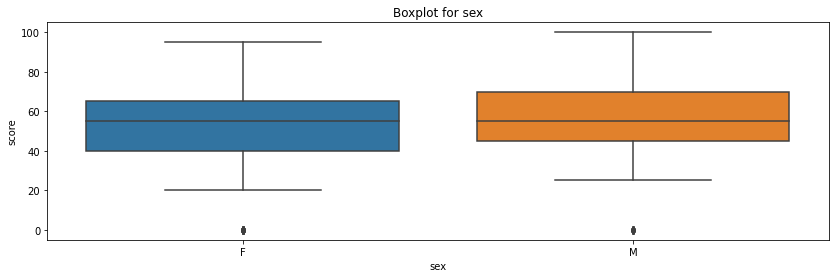

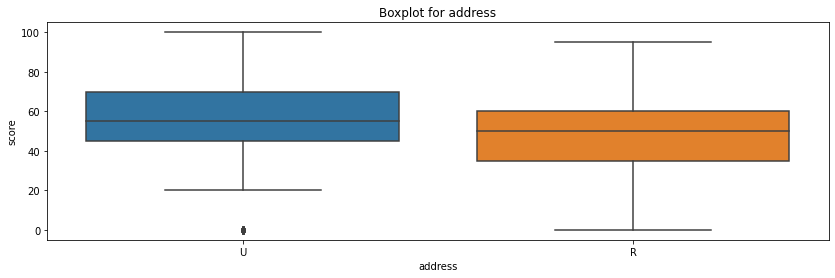

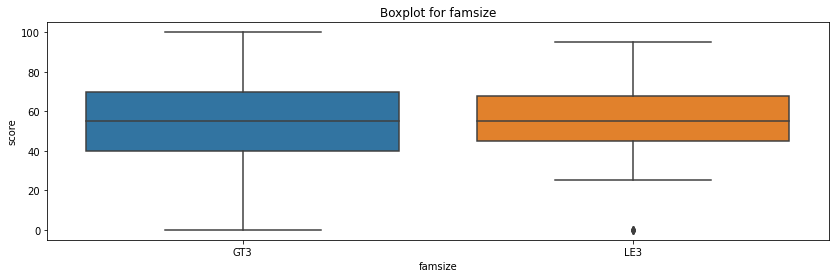

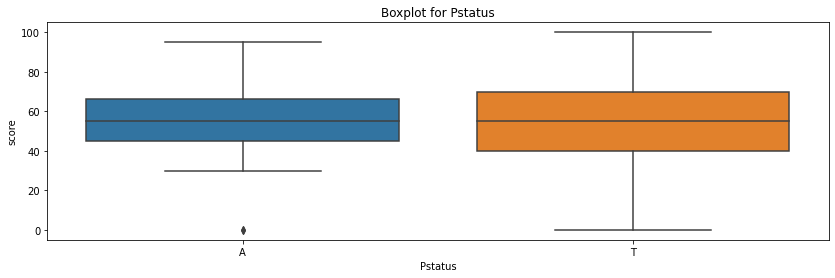

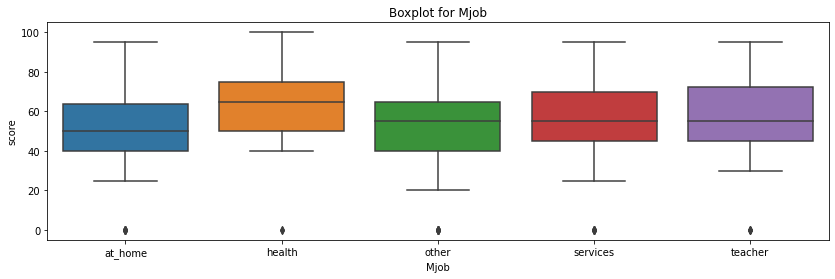

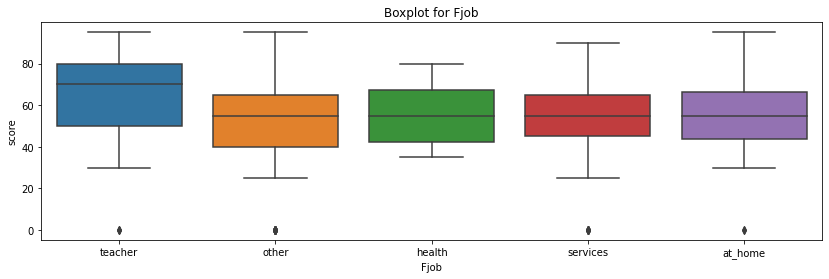

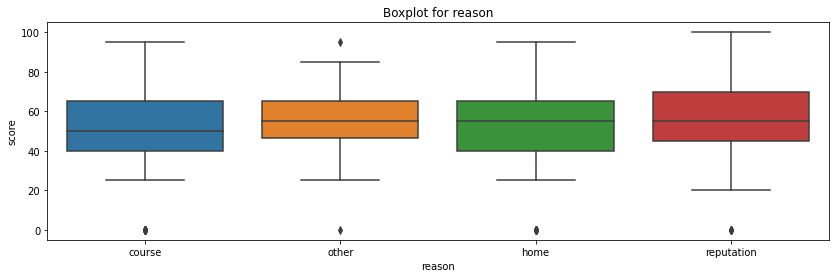

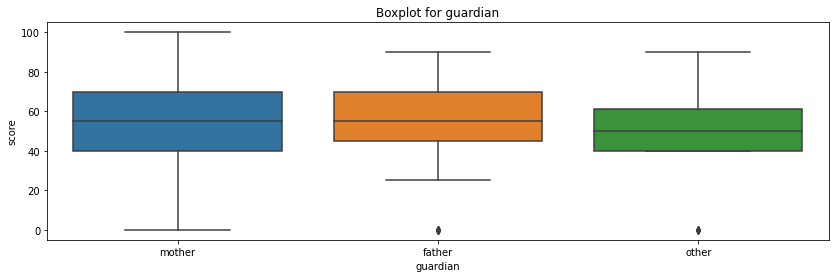

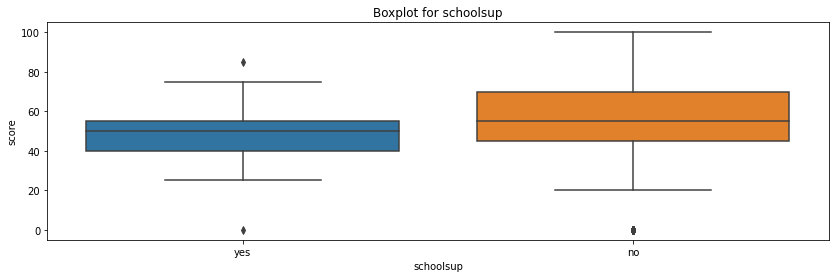

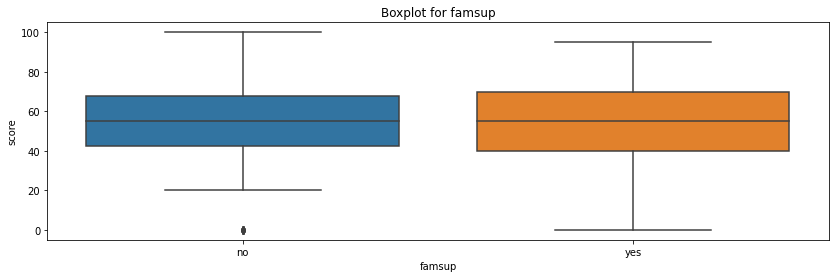

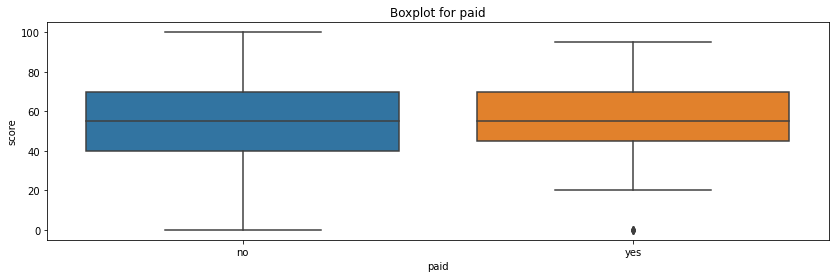

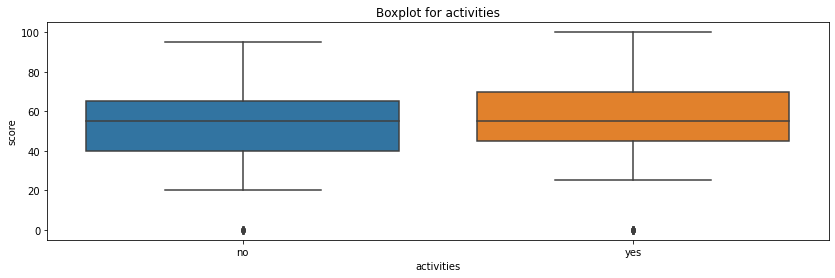

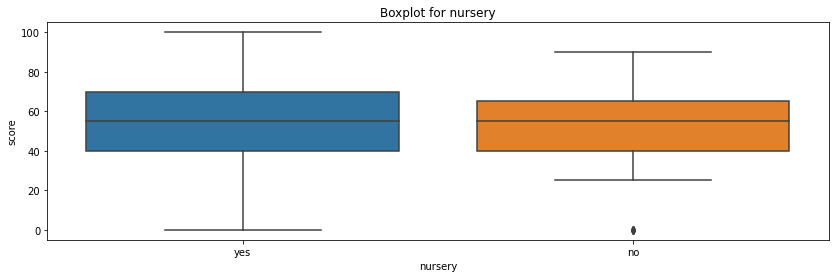

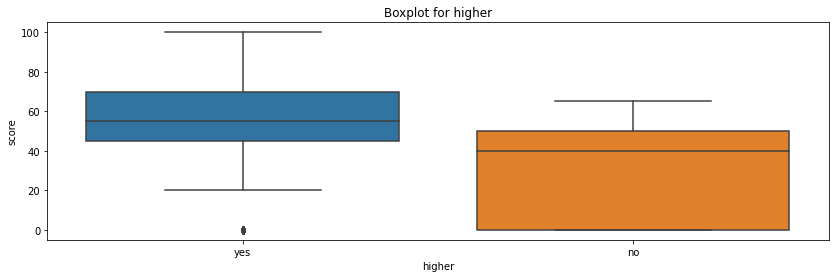

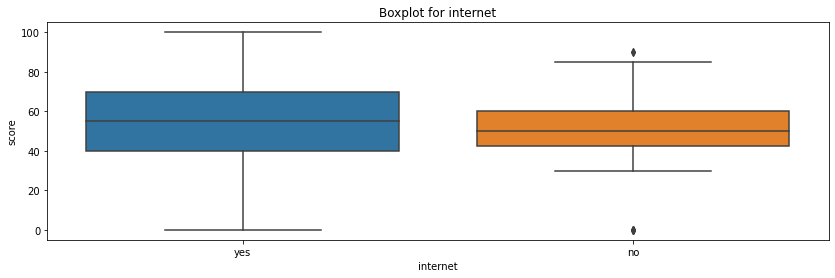

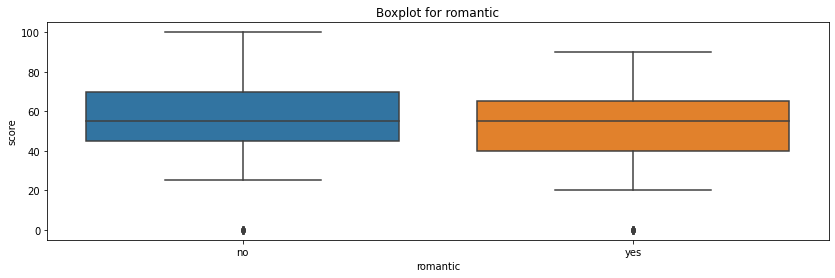

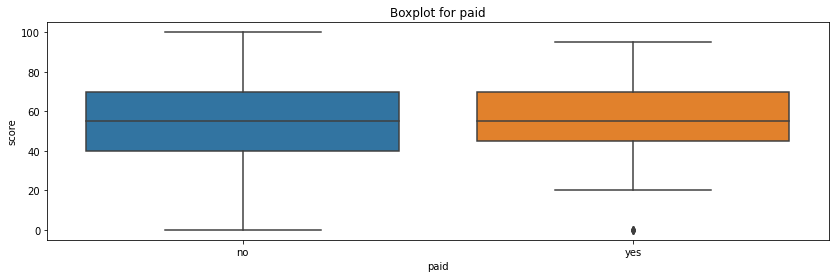

In [104]:
for col in ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic', 'paid']:
    get_boxplot(col)

In [105]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            #print(comb[0],comb[1])
            print('Найдены статистически значимые различия для колонки', column)
            break

In [106]:
for col in ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)
print('Что интересно - на графиках видно, что наличие высшего образования у родителей влияет на средний результат теста, но Т-тест этого не улавливает. Также, студенты у которых Fjob == teacher также в среднем имеют более высокий результат, но при этом T-test отобрал Mjob *visually confused*')

Найдены статистически значимые различия для колонки Mjob
Что интересно - на графиках видно, что наличие высшего образования у родителей влияет на средний результат теста, но Т-тест этого не улавливает. Также, студенты у которых Fjob == teacher также в среднем имеют более высокий результат, но при этом T-test отобрал Mjob *visually confused*


In [107]:
print('На корреляционный таблице видим высокую корреляцию Fedu и Medu, а все отсальные признаки выражены слабо и не коррелируют друг с другом. Видим негативное влияние travel time, go out, health. Позитивное влияние studytime, Medu и Fedu. Что интересно - age и failures показывают отрицательную корреляцию, но важно не путать correlation и  causation. Похоже, что те кто уже провалили экзамен вероятнее провалят его снова, а также что математика становится более сложной по мере продвижения в школе, поэтому и отрицательная корреляция с age ')
students.corr()

На корреляционный таблице видим высокую корреляцию Fedu и Medu, а все отсальные признаки выражены слабо и не коррелируют друг с другом. Видим негативное влияние travel time, go out, health. Позитивное влияние studytime, Medu и Fedu. Что интересно - age и failures показывают отрицательную корреляцию, но важно не путать correlation и  causation. Похоже, что те кто уже провалили экзамен вероятнее провалят его снова, а также что математика становится более сложной по мере продвижения в школе, поэтому и отрицательная корреляция с age 


,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167883,-0.152024,0.090864,-0.002354,0.195891,0.002354,0.055561,0.021067,0.119997,-0.047402,0.156766,-0.153518
Medu,-0.167883,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.014459,0.025335,0.064164,-0.045051,0.097295,0.213349
Fedu,-0.152024,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.026122,-0.025892,0.042663,0.023862,0.040514,0.130923
traveltime,0.090864,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.021542,-0.021937,0.037636,-0.021531,-0.014040,-0.070559
studytime,-0.002354,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.039555,-0.121969,-0.051280,-0.080016,-0.067734,0.115741
failures,0.195891,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.009110,0.098382,0.120914,0.081284,0.069703,-0.344338
studytime_granular,0.002354,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.039555,0.121969,0.051280,0.080016,0.067734,-0.115741
famrel,0.055561,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,-0.039555,1.000000,0.172751,0.077167,0.086309,-0.051402,0.055305
freetime,0.021067,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.172751,1.000000,0.296437,0.061575,-0.070416,0.019026
goout,0.119997,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.077167,0.296437,1.000000,-0.015608,0.036836,-0.129685


In [108]:
students_for_model = students.loc[:, ['age', 'Medu', 'traveltime','studytime','Mjob','failures','studytime_granular','famrel','freetime','goout','health','absences','score']]
students_for_model.head(50)

,age,Medu,traveltime,studytime,Mjob,failures,studytime_granular,famrel,freetime,goout,health,absences,score
0,18.0,4.0,2.0,2.0,at_home,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17.0,1.0,1.0,2.0,at_home,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15.0,1.0,1.0,2.0,at_home,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15.0,4.0,1.0,3.0,health,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16.0,3.0,1.0,2.0,other,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
5,16.0,4.0,1.0,2.0,services,0.0,-6.0,5.0,4.0,2.0,5.0,10.0,75.0
6,16.0,2.0,1.0,2.0,other,0.0,-6.0,4.0,4.0,4.0,3.0,0.0,55.0
7,17.0,4.0,2.0,2.0,other,0.0,-6.0,4.0,1.0,4.0,1.0,6.0,30.0
8,15.0,3.0,1.0,2.0,services,0.0,-6.0,NaN,2.0,2.0,1.0,0.0,95.0
9,15.0,3.0,1.0,2.0,other,0.0,-6.0,5.0,5.0,1.0,5.0,0.0,75.0


In [109]:
students = students.dropna()
X = students[['age', 'Medu', 'traveltime','studytime','failures','studytime_granular','famrel','freetime','goout','health','absences']]
y = students['score']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(pd.DataFrame(regr.coef_))

            0
0   -1.886036
1   -0.645828
2   -2.783982
3   -0.105297
4  -13.736264
5    0.315890
6   -1.890068
7    1.774570
8   -3.145313
9   -0.611002
10   0.285663
